In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

##country level data
df_stats = pd.read_csv("../data/combo_final.csv")
##registry level data
df_stats_reg = pd.read_csv("../data/combo_reg_final.csv")

In [40]:
df_stats.head()

,country_name,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,N0_14,N15_29,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita,Entity,Code,Year,Consumption,Continent
0,Algeria,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,73.2,150.2,389.0,900.6,793.4,2306.4,0.001996,Algeria,DZA,2008,0.20,Africa
1,Argentina,1363473.2,1362708.8,995826.8,955536.4,476624.2,5154169.4,505.8,1072.2,3325.0,14384.2,19659.6,38946.8,0.007556,Argentina,ARG,2008,3.16,South America
2,Australia,4999918.4,5577377.0,5553157.8,6588836.2,3567685.4,26286974.8,2321.8,7039.8,26538.8,149071.2,240196.4,425168.0,0.016174,Australia,AUS,2008,4.69,NaN
3,Austria,1242177.8,1570187.8,1820801.4,2260183.4,1474437.2,8367787.6,552.6,1666.8,6745.8,38611.2,69033.6,116610.0,0.013936,Austria,AUT,2008,6.40,Eastern Europe
4,Bahrain,180708.6,161927.0,110782.4,92510.2,23760.8,569689.0,61.2,86.6,234.4,715.2,545.8,1643.2,0.002884,Bahrain,BHR,2008,0.47,NaN


In [39]:
df_stats_reg.head()

,REGISTRY,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,country_region,country_name,N0_14,...,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita,Entity,Code,Year,Consumption,Continent
0,101200399,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,"Algeria, Batna",Algeria,73.2,...,389.0,900.6,793.4,2306.4,0.001996,Algeria,DZA,2008.0,0.20,Africa
1,140400299,951003.0,1210213.0,700362.0,238030.0,35190.0,3134798.0,"Kenya, Nairobi",Kenya,270.2,...,1320.4,2276.0,1379.6,5696.4,0.001817,Kenya,KEN,2008.0,1.05,Africa
2,169000099,15823.6,17052.6,17238.2,14990.0,5497.8,70602.2,Seychelles,Seychelles,2.4,...,28.6,162.8,173.8,377.8,0.005351,Seychelles,SYC,2008.0,4.54,NaN
3,171000199,434720.2,299955.2,131712.4,134614.2,72407.0,1073409.0,"South Africa, Eastern Cape",South Africa,36.6,...,309.6,779.8,792.8,2014.4,0.001877,South Africa,ZAF,2008.0,3.96,Africa
4,171600270,288098.6,304815.0,187895.2,74049.2,18448.0,873306.0,"Zimbabwe, Harare: African",Zimbabwe,106.8,...,805.8,1120.0,984.8,3397.8,0.003891,Zimbabwe,ZWE,2008.0,1.47,NaN


### Pearson Correlation

In [44]:
df_stats[['country_name','Incidence Per Capita','Consumption']].corr(method = 'pearson')

,Incidence Per Capita,Consumption
Incidence Per Capita,1.000000,0.723006
Consumption,0.723006,1.000000


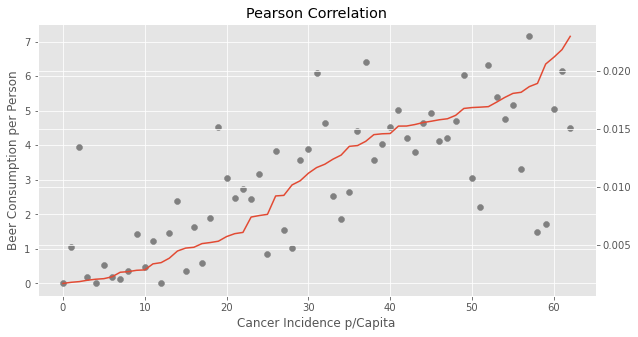

In [46]:
df_ranked = df_stats.sort_values('Incidence Per Capita').reset_index()
fig, ax = plt.subplots(figsize = (10,5))
x = np.arange(len(df_ranked['Incidence Per Capita']))
y1 = df_ranked['Incidence Per Capita']
y2 = df_ranked['Consumption']

ax.set_title('Pearson Correlation')
ax.scatter(x,y2,color = 'grey')
ax.set_ylabel('Beer Consumption per Person')
ax.set_xlabel('Cancer Incidence p/Capita')
ax2 = ax.twinx()
ax2.plot(x,y1)

### Hypothesis Testing

Text(0.5, 1.0, 'Distribution of Cancer Incidence Per Capita')

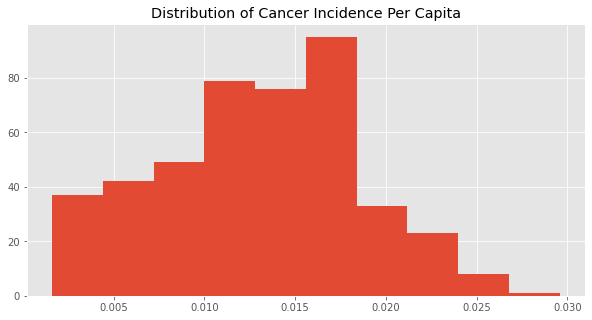

In [57]:
#distribution of cancer incidence rate
fig, ax = plt.subplots(figsize = (10,5))
x = df_stats_reg['Incidence Per Capita']
ax.hist(x)
ax.set_title('Distribution of Cancer Incidence Per Capita')

Null hypothesis: there is no difference in probability of getting cancer between people who drinks beer more than average and people who drinks beer less than average

Alternative hypothesis: there is a difference based on beer consumption

P1 = P(people who drinks beer less than average get cancer);
P1 = P(people who drinks beer more than average get cancer)

H0: P1 = P2;
H1: P1 != P2

In [101]:
alpha = 0.05

In [93]:
#average beer consumption rate
mean = df_stats_reg['Consumption'].mean()
#sample one - people who drinks beer less than average
s1 = df_stats_reg[df_stats_reg['Consumption'] <= mean]['Incidence Per Capita']
#sample two - people who drinks beer greater than average
s2 = df_stats_reg[df_stats_reg['Consumption'] > mean]['Incidence Per Capita']

In [94]:
print("People who drinks beer less than average: Cancer Incidence variance is {}".format(s1.var()))
print("People who drinks beer less than average: sample size is {}".format(len(s1)))
print("People who drinks beer more than average: Cancer Incidence variance is {}".format(s2.var()))
print("People who drinks beer more than average: sample size is {}".format(len(s2)))

People who drinks beer less than average: Cancer Incidence variance is 5.162905843819473e-05
People who drinks beer less than average: sample size is 181
People who drinks beer more than average: Cancer Incidence variance is 1.4457956558151115e-05
People who drinks beer more than average: sample size is 251


In [105]:
stats.ttest_ind(s1,s2,equal_var = False)

Ttest_indResult(statistic=-4.74595660287129, pvalue=3.476899628595322e-06)